1 ANALISI ESPLORATIVA

In [1]:
#importo quello che mi serve
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

In [ ]:
#serve per montare google drive e per poi prendere il dataset salvato che mi interessa
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#inizio a leggere i dati dal csv salvato nel mio drive
#con head legge di default le prime righe
data = pd.read_csv('/content/drive/MyDrive/FondaLabDS2024/wine_1.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#mi fornisce un'idea su tutto il dataset con output le features e alcune statistiche
#agisce solo su feature numeriche, non quelle categoriche
#dalla riga count vedo che ci sono dei valori null su qualche riga perchè il conteggio non è uguale
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,5515.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.217423,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160156,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#visto che ci sono feature con valori continui faccio un pair plot
#di tutti i valori delle varie feature
plt.figure(figsize=(12, 6))
sns.pairplot(data=data)
plt.title('Pairplot di features con valori continui ')

In [ ]:
#posso fare una cosa molto simile dove metto in evidenza il tipo di vino (rosso o bianco)
#specificando il parametro hue
plt.figure(figsize=(12, 6))
sns.pairplot(data=data, hue='type')
plt.title('Pairplot con specifica di  Hue')

In [ ]:
#tramite pandas posso facilmente anche andare a vedere la correlazione tra le varie features
# 1 è correlazine perfetta : se una aumenta l'altra aumenta allo stesso modo
#positiva : se una aumenta anche l'altra aumenta
#negativa: se una aumenta l'altra diminuisce

#qui devo escludere la feature type che è una stringa , altrimenti c'è a runtime l'errore che
#non può essere convertita a float. Per semplicità copio data togliendo quella feuature come segue
data2=data.drop(['type'], axis = 1)

#poi uso direttamente correlation di pandas
correlation = data2.corr()

#poi creo una heatmap per avere una cosa piu bella a livello grafico
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Coefficiente di correlazione tra le feautures ', size=16)

In [ ]:
#conto elementi delle classi rosso e bianco per vedere se il dataset è bilanciato

plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=data)
plt.xlabel('Tipi di vino')
plt.ylabel('Numero per tipologia')
plt.title('Conteggio elementi per  tipo di vino', size=16)

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=data)
plt.xlabel('qualità di vino')
plt.ylabel('Numero per qualità')
plt.title('Conteggio elementi per  qualutà di vino', size=16)

In [ ]:
#boxplot con ciclo for per motivi grafici
for col in data.columns:
    if col != 'type':
       box_plot  = plt.subplots()
       box_plot = sns.boxplot(data[col])
       plt.title(col, size=16)
       plt.show()

<Figure size 1600x600 with 0 Axes>

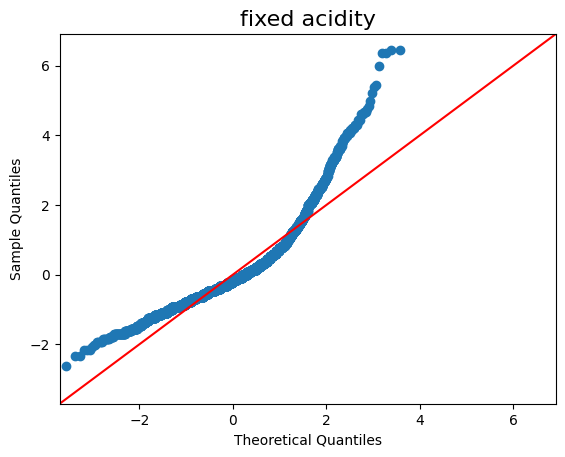

<Figure size 1600x600 with 0 Axes>

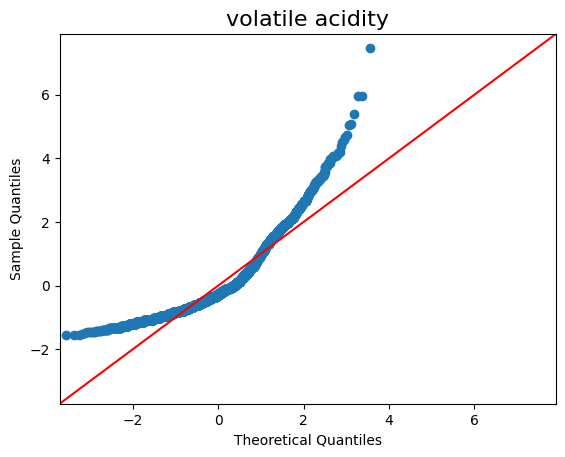

<Figure size 1600x600 with 0 Axes>

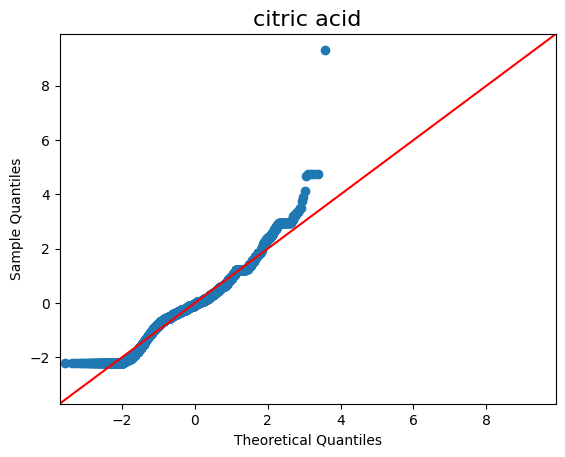

<Figure size 1600x600 with 0 Axes>

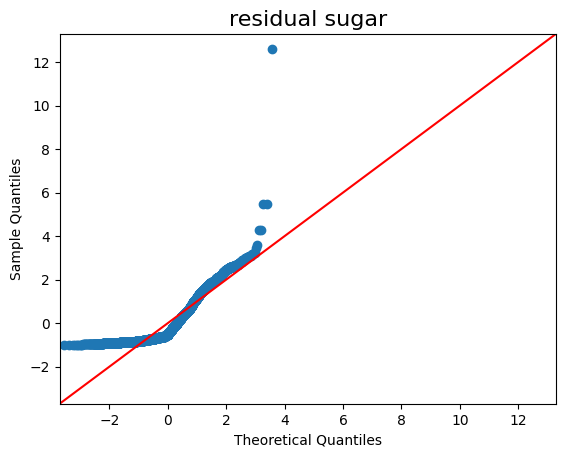

<Figure size 1600x600 with 0 Axes>

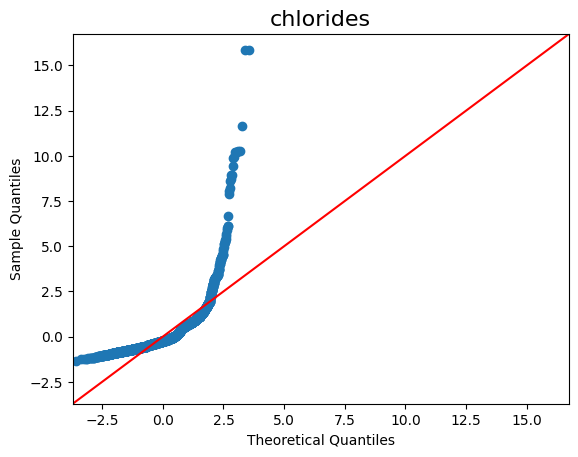

<Figure size 1600x600 with 0 Axes>

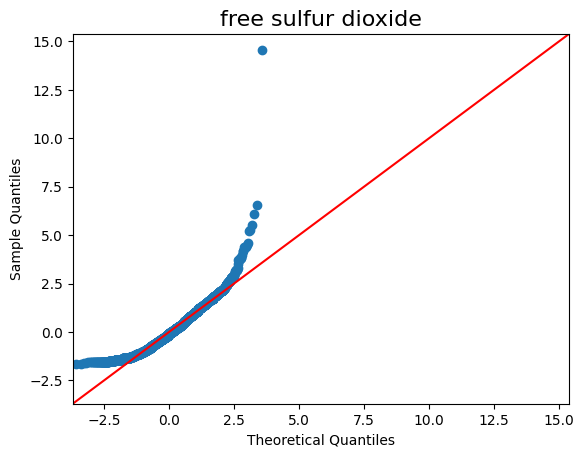

<Figure size 1600x600 with 0 Axes>

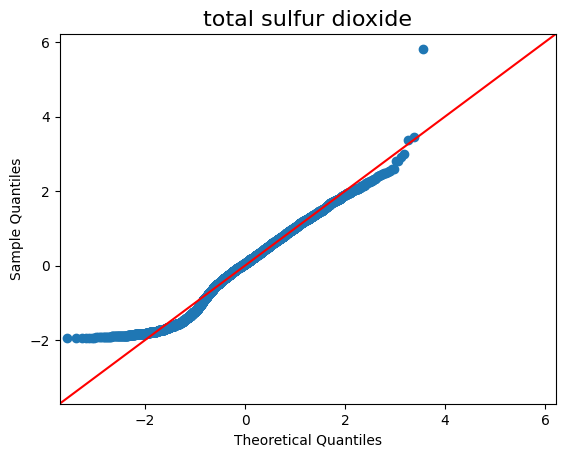

<Figure size 1600x600 with 0 Axes>

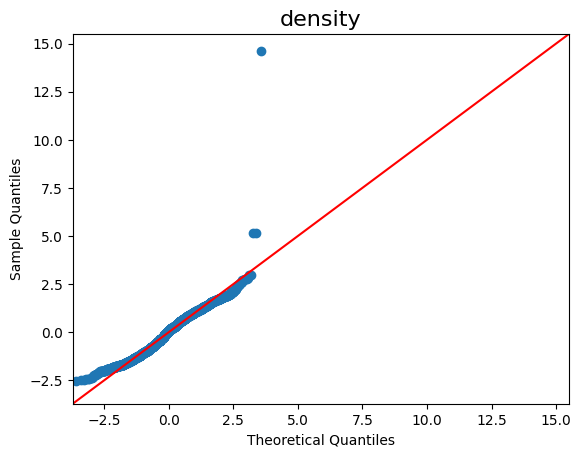

<Figure size 1600x600 with 0 Axes>

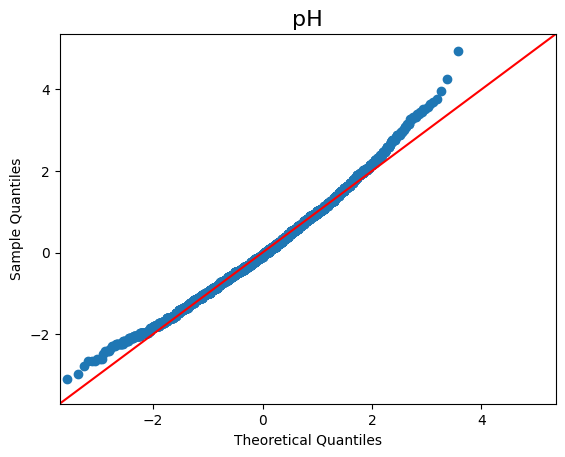

<Figure size 1600x600 with 0 Axes>

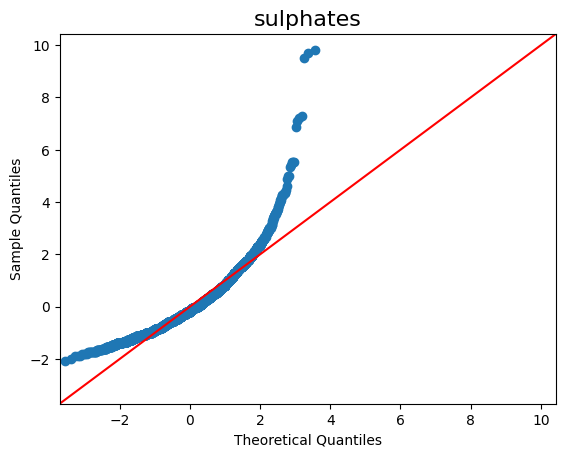

<Figure size 1600x600 with 0 Axes>

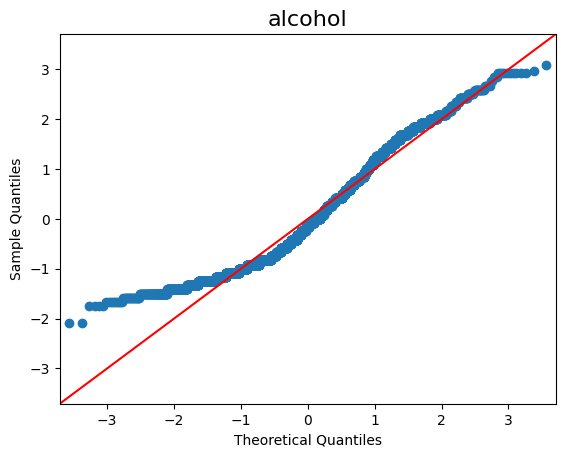

In [ ]:
#vediamo se la distribuzione dei valori delle feautures può essere assimilabile ad un gaussiana
#prima vanno rimosse righe dove non ci sono valori, altrimenti c'è un errore e poi la colonna quality visto che è il target

data_cleared=data.dropna()
data_cleared=data_cleared.drop(['quality'], axis = 1)

for col in data_cleared.columns:
    if col != 'type':
        plt.figure(figsize=(16, 6))
        sm.qqplot(data_cleared[col], line='45', fit=True)
        plt.title(col, size=16)
        plt.show()



In [ ]:
#grafico a violino con ciclo for per motivi grafici
for col in data.columns:
    if col != 'type':
        plt.figure(figsize=(16, 6))
        sns.violinplot(data[col])
        plt.title(col, size=16)
        plt.show()

2 PRE-PROCESSING

In [ ]:
data.isnull().sum() #vedo ch ho diversi missing values, quasi tutti relativi al ph

type                      0
fixed acidity            10
volatile acidity          8
citric acid               3
residual sugar            2
chlorides                 2
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      982
sulphates                 4
alcohol                   0
quality                   0
dtype: int64

In [3]:
#NOTA BENE: prima mi ero accorto che a differenza del dataset "ufficiale" , quello allegato presenta
#dei missing values. Per evitare errori a runtime nelle fasi successive con questa operazione elimino
#tutte le righe dove almeno una feature ha un missing value. Con describe vedo che il count dei valori
#è identico per tutte le features a differenza di quanto visto in una cella precedente
data=data.dropna()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000,5494.000000
mean,7.219048,0.339877,0.317131,5.457326,0.056053,30.364580,114.868584,0.994695,3.217268,0.529882,10.495546,5.825082
std,1.299324,0.166477,0.144042,4.788343,0.034979,17.758175,55.839857,0.003027,0.160060,0.149612,1.197756,0.876177
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.242500,1.800000,0.038000,17.000000,77.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,28.750000,118.000000,0.994880,3.205000,0.500000,10.300000,6.000000
75%,7.700000,0.403750,0.390000,8.100000,0.065000,41.000000,154.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,9.000000


In [4]:
data.isnull().sum() #ora vedo che non ci sono più

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#preprocessing aiuta a preparare i dati prima dell'algoritmo
#dai nomi categorici passo a un formato numerico e lo faccio con type,
#così algoritmi successivi lavorano solo con dati numerici

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#fit capisce relazione tra valori numerici e colonna
#fit prepara modello e transform trasforma effettivamente i dati
le = label_encoder.fit(data['type'])

#aggiungo una colonna  color al dataset e gli assegno il transform di type
data['color'] = le.transform(data['type'])


In [ ]:
#zip a partire da due liste crea una lista unica : raggruppa liste diverse
new_labels = dict(zip(range(len(le.classes_)),le.classes_))
print(new_labels)

#ora so che algoritmi successivi lavorano con questo fit eseguito nella cella precedente, cioè white a 1 e red a 0

{0: 'red', 1: 'white'}


In [6]:
#ora devo separare le variabili dipendenti da quelle indipendenti per poter fare poi la classificazione

X = data.drop(['type', 'quality'], axis=1)  # restano solo le features (tranne type che è categorica)
y = data['quality']  #il target da predirre



3 CLASSIFICAZIONE E ANALISI DEI RISULTATI (vini tutti insieme)

3.1 approccio holdout con un linear SVM

In [7]:
#scalo i dati e li normalizzo per evitare range troppo differenti tra i valori delle singole
#features ( infatti da alcuni grafici avevo visto questo problema ) e così evito che la  variabilità
#eccessiva rischi di influenzare negativamente il risultato dell'algoritmo

from sklearn.preprocessing import StandardScaler
#questo modulo si occupa di fare questa operazione

scaler = StandardScaler()
scaler_fit = scaler.fit(X)  #dico che X sono i dati da scalare e posso salvare questo modello fittato
X_scaled = scaler.transform(X)  #fa effettivamente l'operazione ed ho un array numpy


In [8]:
#ora vanno creati training e test set tramite apposito modulo
from sklearn.model_selection import train_test_split

                                                    #dati da cui faccio split
                                                                 #proporzione del test set
                                                                                #per la riproducibilità dei risultati:sono sicuro che gli  split sono sempre uguali
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10,stratify=y)
#stratify aiuta a mantenere le proporzioni

#X e y divise in trainig e test set

In [9]:
#applico un algoritmo di svc e importo il modulo
from sklearn.svm import LinearSVC

#chiamo clf il modello che utilizzo e gli dico su quali dati addestrarsi
clf = LinearSVC()
clf.fit(X_train,y_train)

print('Accuratezza  sul training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuratezza sul  test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuratezza  sul training set: 0.54
Accuratezza sul  test set: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
#faccio un report
from sklearn.metrics import classification_report

#chiamo predict sul test, cioè su dati che il modello non ha visto
#true sono quelli originali del test set, mentre pred sono quelli derivati dalla classificazione
#faccio confronto tra test e predizione
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#per ogni classe ( cioè qualità che è un int da 1 a 10) ho associate varie metriche
#f1 score è metrica che unisce  precision(capacità di non labellare pos come neg) e recall(capacità del modello di trovare tutti i veri pos)
#support: quanti elementi del test set sono a supporto della classificazione
#macro avarage= trova media tra metriche nella tabella
#weighted= media pesata in base al support

# vedo che  solo per 5 e 6 ho discreti risultati
#in quanto hanno un maggior supporto , ma già avevo visto che i dataset era sbilanciato verso questi

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        36
           5       0.57      0.64      0.61       359
           6       0.50      0.72      0.59       481
           7       0.33      0.01      0.02       183
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1099
   macro avg       0.20      0.20      0.17      1099
weighted avg       0.46      0.53      0.46      1099



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


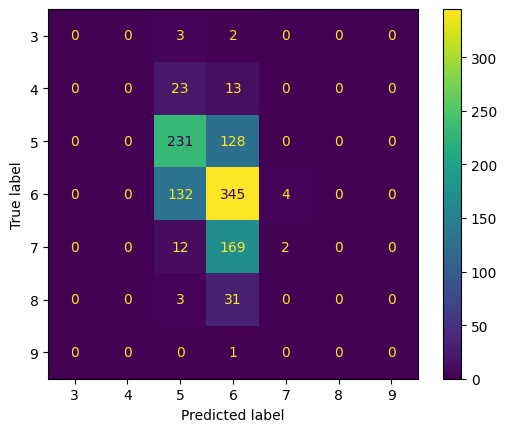

In [11]:
#genero la matrice di confusione , che dice dove il modello sbaglia

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#genera la matrice
cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)

#crea un grafico a partire dalla matrice
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#come nella cella precedente vedo che solo per qualità 5 e 6 il modello ha un discreto risultato

Adesso vediamo la feature importance. Questa va ricavata tramite "permutation_importance" perchè posso avere i metodo feature importance "diretto" solo per modelli ad albero.

In [12]:
#vedaimo alcune metriche abbastanza diffuse in letteratura
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

y_predict = clf.predict(X_test)

print('r2: %.3f' % r2_score(y_test, y_predict)) #misura il legame tra la variabilità dei dati e la correttezza del modello statistico utilizzato
print('MSE: %.3f' % mean_squared_error(y_test, y_predict, squared=False)) # se <1 buono ;indica la discrepanza quadratica media fra i valori dei dati osservati ed i valori dei dati stimati.
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_predict)) #serve per esprimere la % del MAE ed indica l'errore derivante dall'suo di un valore

r2: 0.114
MSE: 0.824
MAPE: 0.092


In [13]:
#proviamo a calcolare la feature importance tramite le permutazioni

from sklearn.inspection import permutation_importance

results = permutation_importance(clf, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza

#per capire la corrispsondenza tra numeri e feeture nell'ultimo ciclo for
cont=0
for i in X.columns:
    cont=str(cont)
    print(cont + ' '+i)
    cont=int(cont)
    cont=cont+1

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 color
Feature: 0, Score: 0.00468
Feature: 1, Score: 0.22273
Feature: 2, Score: 0.00593
Feature: 3, Score: 0.10763
Feature: 4, Score: 0.00207
Feature: 5, Score: 0.01411
Feature: 6, Score: 0.03224
Feature: 7, Score: 0.17804
Feature: 8, Score: 0.00326
Feature: 9, Score: 0.01179
Feature: 10, Score: 0.32308
Feature: 11, Score: 0.00267


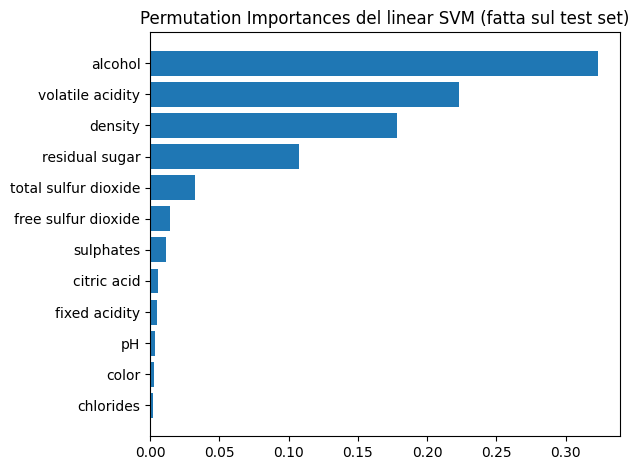

In [14]:
#uguale a sopra ma ne faccio una rappresentazione grafica

sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del linear SVM (fatta sul test set)")
fig.tight_layout()
plt.show()

3.2 approccio cross validation

In [ ]:
#dataset diviso in tanti blocchi con tante interazioni e poi si fa la media
#cos' ogni blocco fa da test set

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10) #cv è il numero di iterazioni

print("%0.2f accuratezza con una deviazione  standard di %0.2f" % (scores.mean(), scores.std()))

#vedo che l'accuratezza è uguale a prima

3.3 Albero decisionale

In [15]:
from sklearn.tree import DecisionTreeClassifier #per l'albero decisionale
from sklearn import metrics #per valutarne accuratezza

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('accuratezza con albero decisionale è',metrics.accuracy_score(prediction_tree,y_test))

accuratezza con albero decisionale è 0.5841674249317561


Text(0.5, 1.0, ' feautures importance dell albero decisionale è  ')

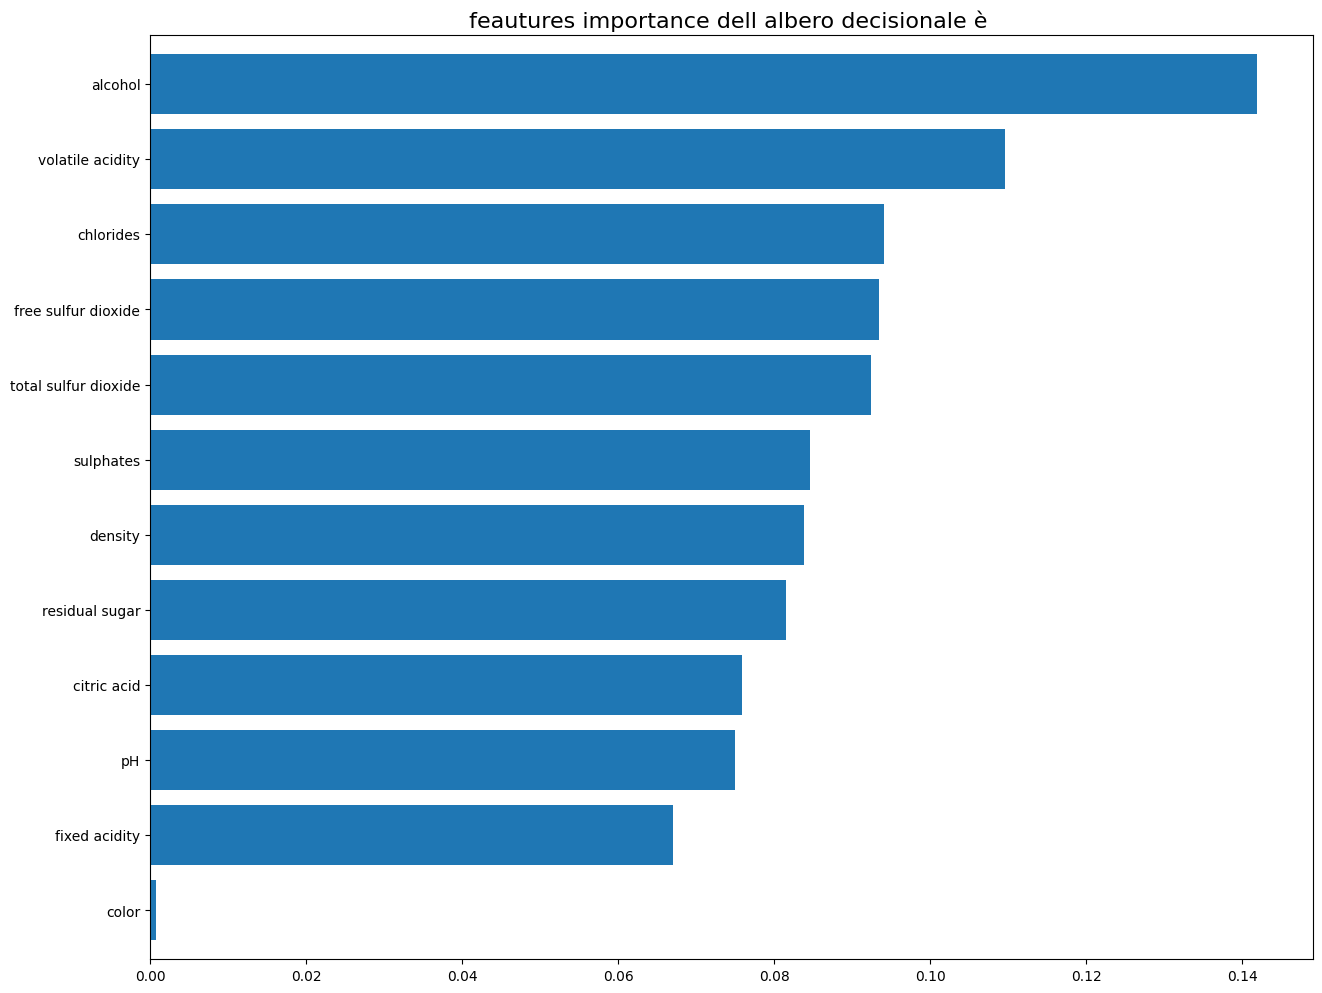

In [16]:
#ne vedo la feature importance visto che accuratezza è superiore anche se di poco

#le richiamo così perchè queste le uso solo nella valutazione di questo algoritmo e quelli successivi
XX = data.drop(['type', 'quality'], axis=1)  #uguale a variaile X
YY=data['quality']                           #uguale a variabile y

plt.figure(figsize=(15,12))
model=DecisionTreeClassifier()
model.fit(XX,YY)
pd.Series(model.feature_importances_,XX.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance dell albero decisionale è  ', size=16)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.10      0.22      0.13        36
           5       0.53      0.15      0.23       359
           6       0.45      0.86      0.59       481
           7       0.50      0.01      0.01       183
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00         1

    accuracy                           0.43      1099
   macro avg       0.23      0.18      0.14      1099
weighted avg       0.46      0.43      0.34      1099



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

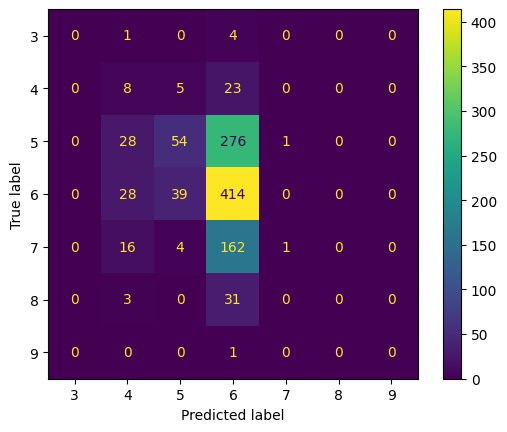

In [17]:
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

cm_tree= confusion_matrix(y_true, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=model.classes_)
disp.plot()

3.4 knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier #per il knn
model=KNeighborsClassifier()
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction_knn,y_test))  # e vedo che è molto simile

The accuracy of the KNN is 0.5759781619654231


In [19]:
#vediamo la feature importance

results = permutation_importance(model, X_train, y_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza


for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11071
Feature: 1, Score: 0.19997
Feature: 2, Score: 0.14432
Feature: 3, Score: 0.15807
Feature: 4, Score: 0.06111
Feature: 5, Score: 0.19073
Feature: 6, Score: 0.16655
Feature: 7, Score: 0.14106
Feature: 8, Score: 0.16927
Feature: 9, Score: 0.18024
Feature: 10, Score: 0.36314
Feature: 11, Score: 0.06241


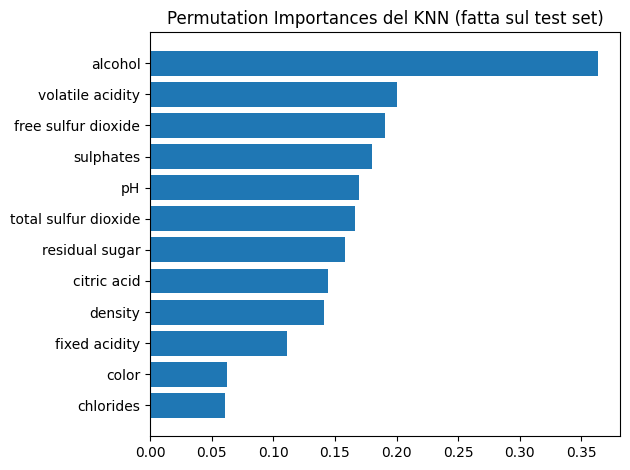

In [20]:
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del KNN (fatta sul test set)")
fig.tight_layout()
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.25      0.11      0.15        36
           5       0.60      0.70      0.65       359
           6       0.58      0.59      0.59       481
           7       0.54      0.48      0.50       183
           8       0.43      0.18      0.25        34
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1099
   macro avg       0.34      0.29      0.31      1099
weighted avg       0.56      0.58      0.57      1099



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


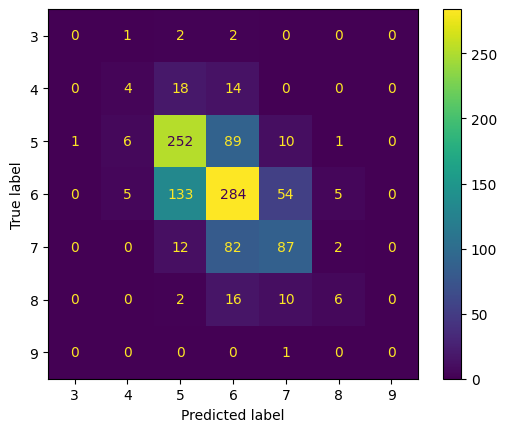

In [21]:
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

cm_knn= confusion_matrix(y_true, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model.classes_)
disp.plot()

Vediamo come cambia l'accuratezza del knn se vado a specificare meglio alcuni parametri del modello

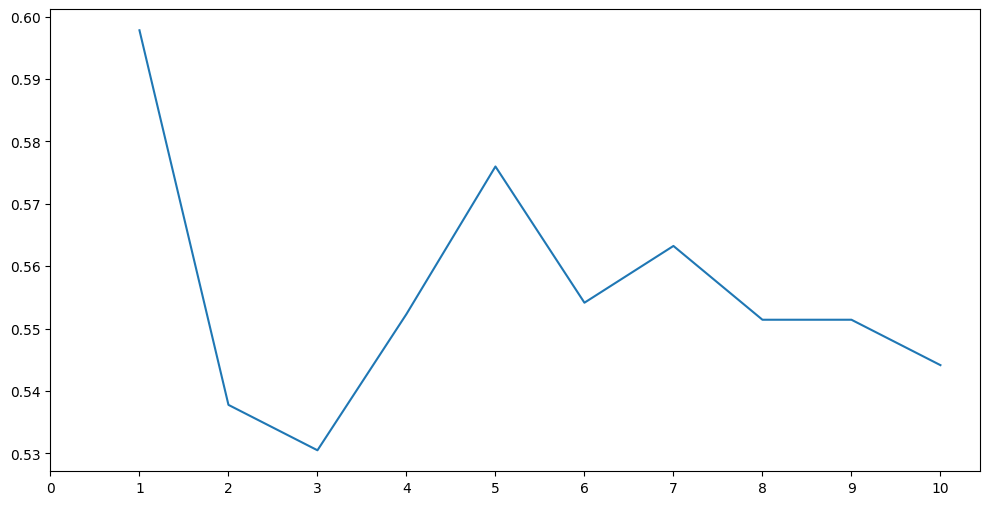

Accuratezza per diversi valori del parametro: [0.5978162  0.5377616  0.53048226 0.55232029 0.57597816 0.55414013
 0.56323931 0.55141037 0.55141037 0.54413103] e il miglior valore è il seguente  0.5978161965423112


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train )
    prediction=model.predict(X_test)
    a=pd.concat([a, pd.Series(metrics.accuracy_score(prediction,y_test))])
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuratezza per diversi valori del parametro:',a.values,'e il miglior valore è il seguente ',a.values.max())

Vedo quindi che l situazione iniziale dove il parametro non era stato specificato si comporta bene

3.5 Random forest


In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction_rdn=model.predict(X_test)
print('accuratezza del Random Forests è',metrics.accuracy_score(prediction_rdn,y_test))

accuratezza del Random Forests è 0.6651501364877161


Text(0.5, 1.0, ' feautures importance del random forest  ')

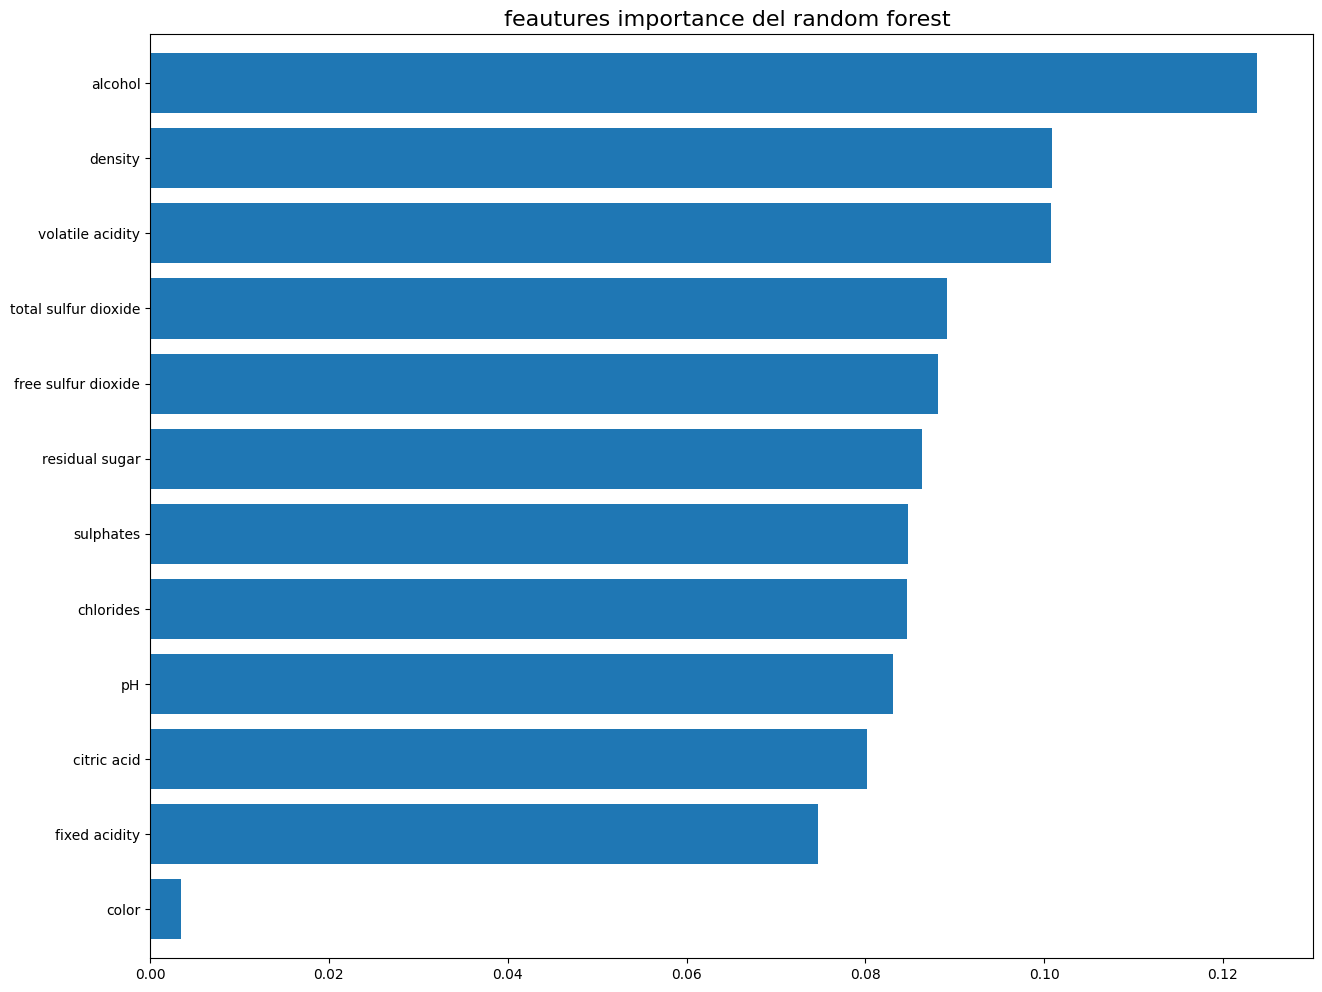

In [ ]:
#vedo che questo è il migliore e mostro la feature importance relativa


plt.figure(figsize=(15,12))
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(XX,YY)
pd.Series(model.feature_importances_,XX.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest  ', size=16)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.08      0.25      0.12        36
           5       0.30      0.72      0.43       359
           6       0.43      0.12      0.19       481
           7       0.00      0.00      0.00       183
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00         1

    accuracy                           0.30      1099
   macro avg       0.12      0.16      0.11      1099
weighted avg       0.29      0.30      0.23      1099



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

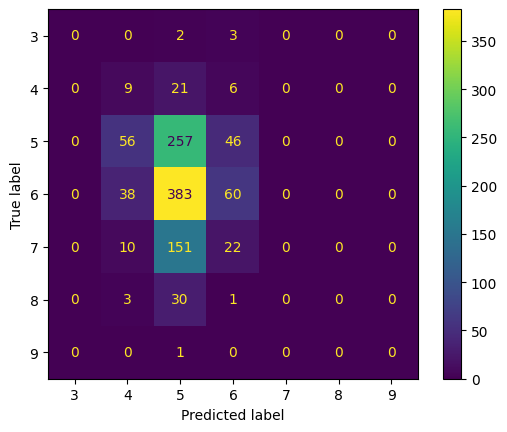

In [ ]:
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

cm_rf= confusion_matrix(y_true, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp.plot()

Anche qui provo a fare un Hyper-Parameters Tuning con il random forest andando a vedere come varia il modello per alcuni parametri

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(XX,YY) #lenta da eseguire
print(gd.best_score_)
print(gd.best_estimator_)

#vedo che senza specificare parametri il modello è meglio

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.49833778347926827
RandomForestClassifier(n_estimators=900, random_state=0)


3.6 Voting Classifier

noto che con questo approccio, grazie ad alta accuratezza del random forest, se li metto insieme con questo approccio globalmente la situazione migliora

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

#lo faccio con i tre modelli più accuarti
voting=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                             ],
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',voting.score(X_test,y_test))
cross=cross_val_score(voting,X,y, cv = 5,scoring = "accuracy") #questa riga è lenta da eseguire, posso cambiare parametro cv
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.6023657870791629


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


The cross validated score is 0.41207605523153185


In [ ]:
#per altre metriche
y_predict = voting.predict(X_test)

print('r2: %.3f' % r2_score(y_test, y_predict))
print('MSE: %.3f' % mean_squared_error(y_test, y_predict, squared=False))
print('MAPE: %.3f' % mean_absolute_percentage_error(y_test, y_predict))

r2: 0.113
MSE: 0.824
MAPE: 0.087


In [ ]:
#anche qui la feature importance , ma direttamente il grafico senza stampare i valori

results = permutation_importance(voting, X_train, y_train, scoring='r2', n_jobs=-1)  #qui messo ovviamente voting come parametro, è lenta da esguire
importance = results.importances_mean

sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del voting classifier ")
fig.tight_layout()
plt.show()

In [ ]:
y_true, y_pred = y_test, voting.predict(X_test)
print(classification_report(y_true, y_pred))

cm_voting= confusion_matrix(y_true, y_pred, labels=voting.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=model.classes_)
disp.plot()

4 CLASSIFICAZIONE E ANALISI DEI RISULTATI (vini separati)

4.1 Vini rossi

Ripercorriamo alcuni passaggi del capitolo precedente ma addestriamo i modelli solo sul vino rosso e confrontiamo i risultati. L'analisi si concentra solo sul SVM ( visto che knn e decision tree sono molto simili a livello di accuratezza) e random forest (visto che è risultato essere il modello più accurato in precedenza)


4.1.1 Linear SVC con approccio holdout

In [ ]:
#prendo solo dati dei vini rossi eliminando quelli bianchi
data_red=data.drop(data[data['type'] == 'white'].index)

Xred = data_red.drop(['type', 'quality'], axis=1)  # restano solo le features numeriche (tranne type che è categorica) e tolgo il target
yred = data_red['quality']  #il target da predirre

In [ ]:
#riscalo i dati

from sklearn.preprocessing import StandardScaler
scalerred = StandardScaler()
scaler_fit = scalerred.fit(Xred)
Xred_scaled = scalerred.transform(Xred)

In [ ]:
#rifaccio lo split in test e training set

from sklearn.model_selection import train_test_split
Xred_train, Xred_test, yred_train, yred_test = train_test_split(Xred_scaled, yred, test_size=0.2, random_state=1,stratify=yred)

clf.fit(Xred_train,yred_train) #riutilizzo il modello SVM definito nella parte dei vini generale
print('Accuratezza  sul training set per vini rossi : {:.2f}'.format(clf.score(Xred_train, yred_train)))
print('Accuratezza sul  test set per vini rossi: {:.2f}'.format(clf.score(Xred_test, yred_test)))

#vedo che ho migliorato abbastanza i risultati

Accuratezza  sul training set per vini rossi : 0.60
Accuratezza sul  test set per vini rossi: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#faccio il report

yred_true, yred_pred = yred_test, clf.predict(Xred_test)
print(classification_report(yred_true, yred_pred))  #vedo che solo 5 e 6 hanno buon supporto

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.65      0.72      0.68       117
           6       0.51      0.65      0.57       108
           7       0.50      0.09      0.15        33
           8       0.00      0.00      0.00         3

    accuracy                           0.58       272
   macro avg       0.28      0.24      0.23       272
weighted avg       0.54      0.58      0.54       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


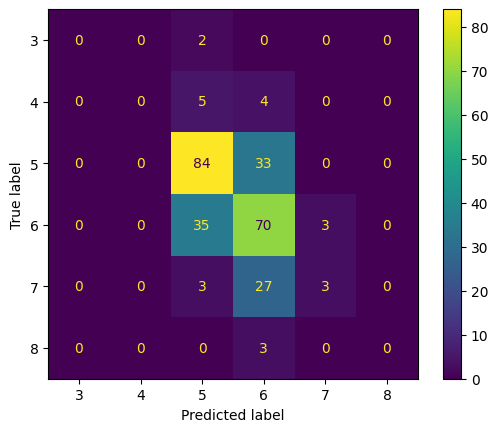

In [ ]:
#rigenero la cm
cm_red= confusion_matrix(yred_true, yred_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_red, display_labels=clf.classes_)
disp.plot()

In [ ]:
#vediamo delle metriche per confronto rispetto vini senza distizione di colore; noto miglioramento

yred_predict = clf.predict(Xred_test)

print('r2: %.3f' % r2_score(yred_test, yred_predict))
print('MSE: %.3f' % mean_squared_error(yred_test, yred_predict, squared=False))
print('MAPE: %.3f' % mean_absolute_percentage_error(yred_test, yred_predict))

r2: 0.150
MSE: 0.745
MAPE: 0.084


In [ ]:
results = permutation_importance(clf, Xred_train, yred_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza

#per capire la corrispsondenza tra numeri e feeture nell'ultimo ciclo for
cont=0
for i in Xred.columns:
    cont=str(cont)
    print(cont + ' '+i)
    cont=int(cont)
    cont=cont+1

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 color
Feature: 0, Score: 0.10674
Feature: 1, Score: 0.14138
Feature: 2, Score: 0.05689
Feature: 3, Score: 0.02169
Feature: 4, Score: -0.00225
Feature: 5, Score: 0.05971
Feature: 6, Score: 0.18025
Feature: 7, Score: 0.09238
Feature: 8, Score: -0.00648
Feature: 9, Score: 0.08984
Feature: 10, Score: 0.26558
Feature: 11, Score: 0.00000


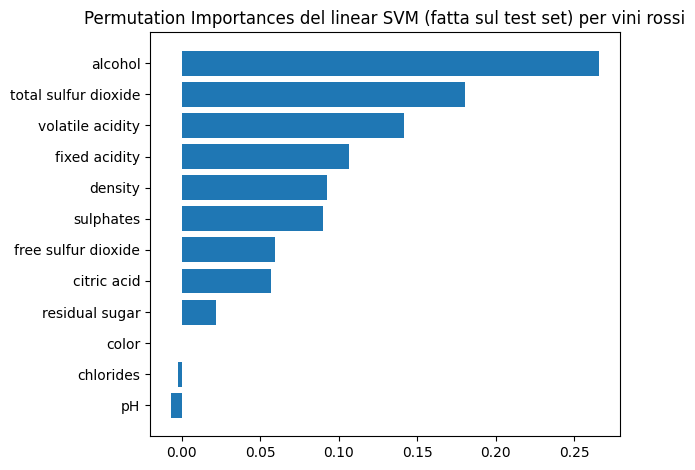

In [ ]:
#faccio grafico
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(Xred.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del linear SVM (fatta sul test set) per vini rossi")
fig.tight_layout()
plt.show()

4.1.2 Random forest vini rossi

In [ ]:

model=RandomForestClassifier(n_estimators=100)
model.fit(Xred_train,yred_train)
prediction_rdn=model.predict(Xred_test)
print('accuratezza del Random Forests sui vini rossi è ',metrics.accuracy_score(prediction_rdn,yred_test)) #come SVM migliora, ma di pochissimo


accuratezza del Random Forests sui vini rossi è  0.6875


Text(0.5, 1.0, ' feautures importance del random forest sui vini rossi ')

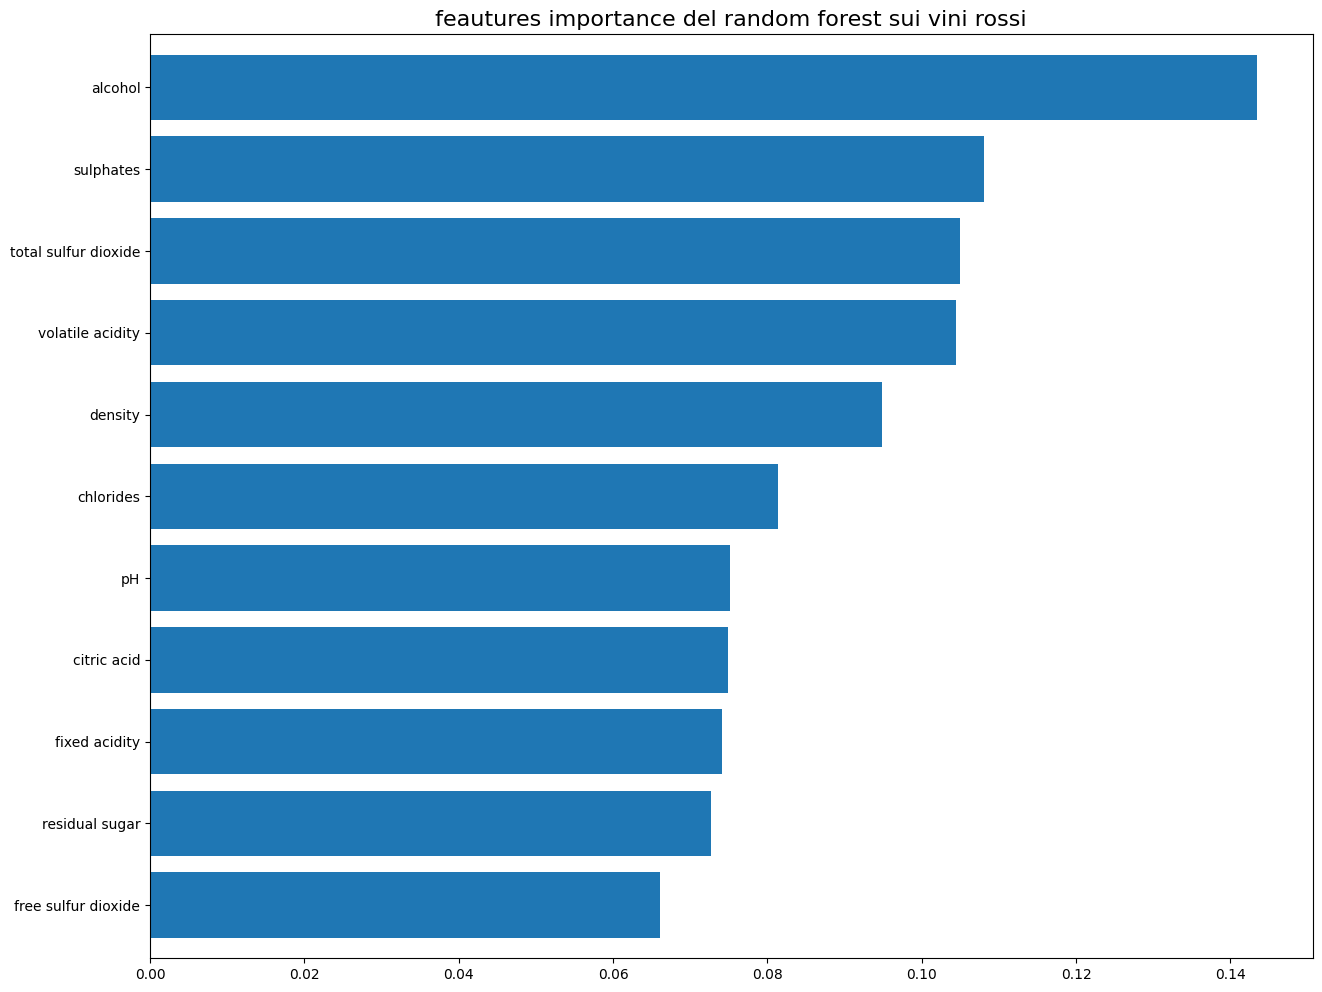

In [ ]:
#vedo,visto che è miglioarto, se cambia la feature importance rispetto a prima e mi accorgo che qualcosa effettivamente cambia

XXred = data_red.drop(['type', 'quality','color'], axis=1) #qui tolgo anche color perchè tanto ho solo rossi
YYred=data_red['quality']

plt.figure(figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(XXred,YYred)
pd.Series(model.feature_importances_,XXred.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest sui vini rossi ', size=16)

4.2 Vini bianchi

Ora ripercorro gli stessi passi appena visti con i vini rossi

In [23]:
from sklearn.preprocessing import StandardScaler

#prendo dati dei soli bianchi
data_w=data.drop(data[data['type'] == 'red'].index)
Xw = data_w.drop(['type', 'quality'], axis=1)
yw = data_w['quality']  #il target da predirre

#e li riscalo
scalerw = StandardScaler()
scaler_fit = scalerw.fit(Xw)
Xw_scaled = scalerw.transform(Xw)

4.2.1 Linear SVC con approccio holdout

In [24]:
#rifaccio lo split in test e training set

from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw_scaled, yw, test_size=0.2, random_state=1,stratify=yw)

clf.fit(Xw_train,yw_train) #riutilizzo il modello SVM definito nella parte dei vini generale
print('Accuratezza  sul training set per vini bianchi : {:.2f}'.format(clf.score(Xw_train, yw_train)))
print('Accuratezza sul  test set per vini bianchi: {:.2f}'.format(clf.score(Xw_test, yw_test)))

#vedo che i risultati sono simili a quelli con tutti i vini; probabilmente deriva dal fatto che il dataset è sbilnaciato verso i vini bianchi

Accuratezza  sul training set per vini bianchi : 0.53
Accuratezza sul  test set per vini bianchi: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#faccio il report

yw_true, yw_pred = yw_test, clf.predict(Xw_test)
print(classification_report(yw_true, yw_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        27
           5       0.63      0.53      0.57       243
           6       0.51      0.82      0.63       373
           7       0.35      0.04      0.07       150
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00         1

    accuracy                           0.53       828
   macro avg       0.21      0.20      0.18       828
weighted avg       0.48      0.53      0.46       828



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


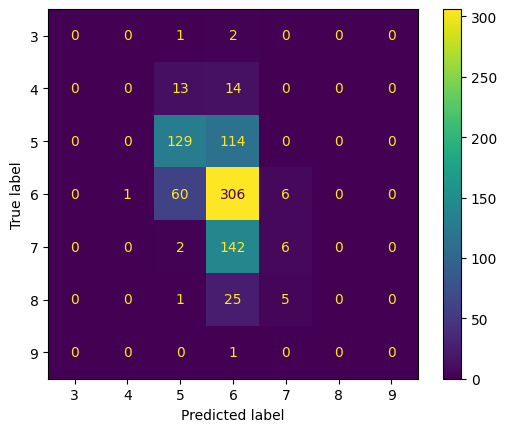

In [ ]:
#genera la cm dei vini bianchi
cmw = confusion_matrix(yw_true, yw_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmw, display_labels=clf.classes_)
disp.plot()

#vedo che stavolta miglioro un po la situazione per la classe di qualità 7 perchè ho un maggior supporto

In [ ]:
#sempre alcune metriche per confronto

yw_predict = clf.predict(Xw_test)

print('r2: %.3f' % r2_score(yw_test, yw_predict))
print('MSE: %.3f' % mean_squared_error(yw_test, yw_predict, squared=False))
print('MAPE: %.3f' % mean_absolute_percentage_error(yw_test, yw_predict))

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 color
Feature: 0, Score: -0.01755
Feature: 1, Score: 0.19595
Feature: 2, Score: 0.00123
Feature: 3, Score: 0.20990
Feature: 4, Score: 0.00881
Feature: 5, Score: 0.00199
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.34592
Feature: 8, Score: 0.00360
Feature: 9, Score: 0.00337
Feature: 10, Score: 0.27289
Feature: 11, Score: 0.00000


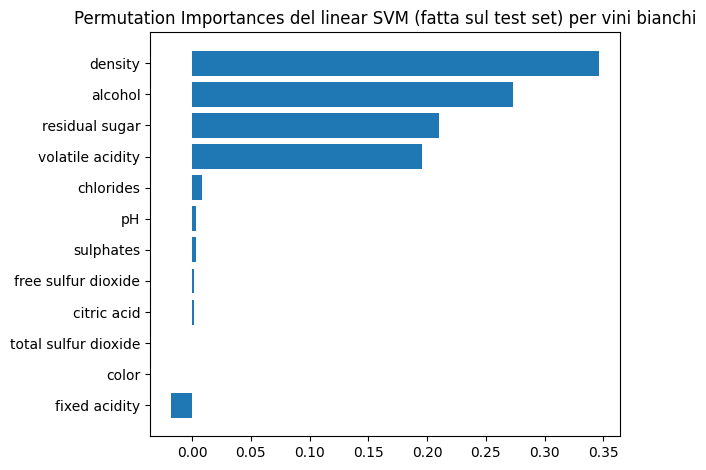

In [ ]:
results = permutation_importance(clf, Xw_train, yw_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean  #prende l'importanza

#per capire la corrispsondenza tra numeri e feeture nell'ultimo ciclo for
cont=0
for i in Xw.columns:
    cont=str(cont)
    print(cont + ' '+i)
    cont=int(cont)
    cont=cont+1

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


#faccio grafico
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(Xw.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del linear SVM (fatta sul test set) per vini bianchi")
fig.tight_layout()
plt.show()

4.2.2 Random forest vini bianchi

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(Xw_train,yw_train)
prediction_rdn=model.predict(Xw_test)
print('accuratezza del Random Forests sui vini bianchi è ',metrics.accuracy_score(prediction_rdn,yw_test)) #migliora ma di pochissimo

#questo a testimonianza dello sbilanciamento del dataset verso i vini bianchi: il modello migliora più sui rossi se tengo la tipologia separata

accuratezza del Random Forests sui vini bianchi è  0.677536231884058


In [ ]:
XXw = data_w.drop(['type', 'quality','color'], axis=1)
YYw=data_w['quality']

plt.figure(figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(XXw,YYw)
pd.Series(model.feature_importances_,XXw.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest sui vini bianchi ', size=16)

5 CLASSIFICAZIONE CON DIVERSO APPROCCIO SUI MISSING VALUES

Se rivedo il dataset all'inizio, mi accorgo della seguente situazione per i missing values

In [ ]:
#rileggo per semplicità con una nuova variabile visto che data era già stata troncata
data3 = pd.read_csv('/content/drive/MyDrive/FondaLabDS2024/wine_1.csv')
data3.isnull().sum()

type                      0
fixed acidity            10
volatile acidity          8
citric acid               3
residual sugar            2
chlorides                 2
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      982
sulphates                 4
alcohol                   0
quality                   0
dtype: int64

Prima ho tronacto tutte le righe con valori nulli. In questa fase vediamo se gestiamo i valori nulli sul ph (gli altri valori nulli li tronchiamo in quanto sono in numero estremamente basso rispetto alla situazione del ph).
Quindi devo pensare a come rimpiazzare questo valore nullo quando si presenta.

Assegno ai valori null del ph il valore medio del ph in base alla tipologia di colore

In [ ]:
#prima elimino i missing values per escluderli dal calcolo della  media
data4=data3.dropna()

#ora calcolo valori medi del ph in base al colore del vino
data4.groupby('type')['pH'].mean()

type
red      3.309233
white    3.187131
Name: pH, dtype: float64

In [ ]:
#assegno ai rossi e bianchi le medie del pH appena ricavate
data3.loc[(data3.pH.isnull())&(data3.type=='red'),'pH']=3.31
data3.loc[(data3.pH.isnull())&(data3.type=='white'),'pH']=3.18
data3.isnull().sum() #controllo che non ho missing values sul ph

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
#elimino altri missing values
data3=data3.dropna()
data3.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Parte di preprocessing dove uso label encoder, riscalo i dati e divido train e test set

In [ ]:
#come già visto
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

le = label_encoder.fit(data3['type'])

#aggiungo una colonna  color al dataset e gli assegno il transform di type
data3['color'] = le.transform(data3['type'])

new_labels = dict(zip(range(len(le.classes_)),le.classes_))
print(new_labels)

{0: 'red', 1: 'white'}


Ora rivedo la classificazione con il linear SVM e se migliora l'accuratezza

Siccome ho gestito in modo diverso i missing values, creo un nuovo modello e lo addestro con questi dati gestiti con la sostituzione e non la rimozione dei missing values. Per il resto a livello teorico e di codice non cambia nulla rispetto a prima

In [ ]:
#divido feature da target

X3= data3.drop(['type', 'quality'], axis=1)
y3 = data3['quality']

In [ ]:
#scalo i dati

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_fit = scaler.fit(X3)  #dico che X sono i dati da scalare e posso salvare questo modello fittato
X3_scaled = scaler.transform(X3)

In [ ]:
#faccio divisione test e training

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.2, random_state=10,stratify=y3)



In [ ]:
#uso un svm e lo chiamo così

from sklearn.svm import LinearSVC

svm= LinearSVC()
svm.fit(X3_train,y3_train)

print('Accuratezza  sul training set: {:.2f}'.format(svm.score(X3_train, y3_train)))
print('Accuratezza sul  test set: {:.2f}'.format(svm.score(X3_test, y3_test)))

Accuratezza  sul training set: 0.54
Accuratezza sul  test set: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_predict = svm.predict(X3_test)

print('r2: %.3f' % r2_score(y3_test, y_predict))
print('MSE: %.3f' % mean_squared_error(y3_test, y_predict, squared=False))
print('MAPE: %.3f' % mean_absolute_percentage_error(y3_test, y_predict))

r2: 0.094
MSE: 0.830
MAPE: 0.094


Vedo che i riusltati sono identici, se non leggermente peggiori sul test set. Anche dal report vedo uguale


In [ ]:
from sklearn.metrics import classification_report

y3_true, y3_pred = y3_test, svm.predict(X3_test)
print(classification_report(y3_true, y3_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.57      0.59      0.58       426
           6       0.50      0.75      0.60       565
           7       0.50      0.01      0.02       215
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.52      1294
   macro avg       0.22      0.19      0.17      1294
weighted avg       0.49      0.52      0.46      1294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


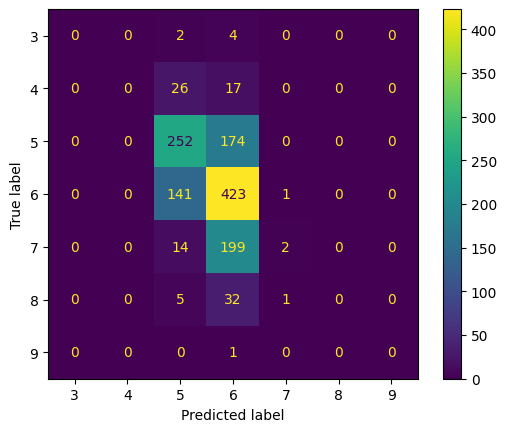

In [ ]:
#genera la cm
cm3 = confusion_matrix(y3_true, y3_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=svm.classes_)
disp.plot()

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 color
Feature: 0, Score: -0.01186
Feature: 1, Score: 0.19973
Feature: 2, Score: 0.00015
Feature: 3, Score: 0.04069
Feature: 4, Score: -0.00157
Feature: 5, Score: 0.00679
Feature: 6, Score: 0.03212
Feature: 7, Score: 0.10513
Feature: 8, Score: -0.00679
Feature: 9, Score: 0.00613
Feature: 10, Score: 0.35700
Feature: 11, Score: 0.00507


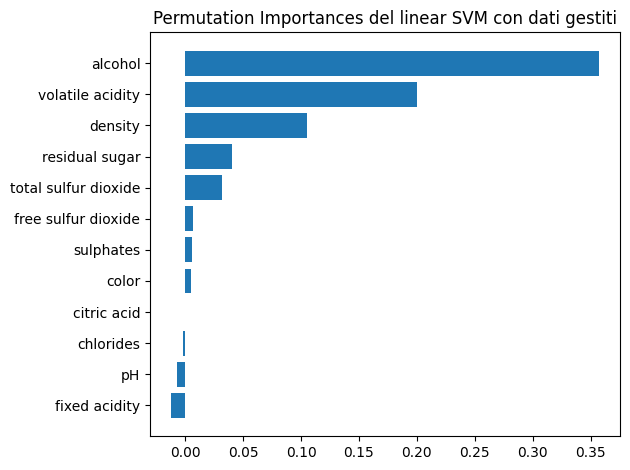

In [ ]:
#vedo la feauture importance

results = permutation_importance(svm, X3_train, y3_train, scoring='r2', n_jobs=-1)
importance = results.importances_mean

#per capire la corrispsondenza tra numeri e feeture nell'ultimo ciclo for
cont=0
for i in X3.columns:
    cont=str(cont)
    print(cont + ' '+i)
    cont=int(cont)
    cont=cont+1

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X3.columns[sorted_idx], results.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances del linear SVM con dati gestiti")
fig.tight_layout()
plt.show()

A questo punto vedo anche come si comporta il random forest , visto che era il miglior modello in precedenza

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X3_train,y3_train)
prediction_rdn=model.predict(X3_test)
print('accuratezza del Random Forests è',metrics.accuracy_score(prediction_rdn,y3_test))

accuratezza del Random Forests è 0.6901081916537867


vedo che migliora e allora studio anche la sua feature importance, per vedere se e  considera diversamente alcune features

In [ ]:
XX3 = data3.drop(['type','quality'], axis=1)
YY3=data3['quality']

plt.figure(figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(XX3,YY3)
pd.Series(model.feature_importances_,XX3.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title(' feautures importance del random forest  ', size=16)

vedo che cambia e anche che il pH perde un po' di significatività

6 CONCLUSIONI


Tra i modelli visti quello più accurato è il random forest . Infatti gli altri hanno tutti  un'accuratezza abbastanza inferiore ma comunque molto simile tra di loro.

C'è una differenza di classificazione se si considera oppure no la feature relativa al colore.
Essendo il dataset sbilanciato verso i vini bianchi , si è dimostrato come la differenza principale in questo caso consiste solo nella classificazione dei vini rossi.
Infatti se considero il modello "totale" e quello dei soli vini bianchi, i risultati sono pressochè identici, mentre il confronto con quello dei vini rossi mostra come il modello separato dei rossi sia più accurato.

Ad influire negativamente sulle prestazioni dei vari modelli influisce anche il fatto che il dataset è sbilnaciato verso le classi di qualità 5 e 6 : infatti le altre classi spesso vengono erroneamente classificate come 5 e 6.